In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [6]:
class LRegression:
    def __init__(self, x, y, color, title, filename, xlabel, ylabel):
        self.x = x
        self.y = y
        self.x_mean = stat.mean(x)
        self.y_mean = stat.mean(y)

        self.color = color
        self.title = title
        self.filename = filename
        self.xlabel = xlabel
        self.ylabel = ylabel
    
    def get(self):
        #definicao do coeficiente angular (a):
        a_def = 0
        for i in range(len(self.x)):
            a_def += ((self.x[i]-self.x_mean) * (self.y[i]-self.y_mean))
        a_div = 0
        for i in range(len(self.x)):
            a_div += pow((self.x[i] - self.x_mean), 2)
        a = (a_def/a_div)
        b = self.y_mean - (self.x_mean * a) #definicao do coeficiente linear (b)
        
        #incerteza de Y
        incY = 0
        for i in range(len(self.x)):
            incY += pow((self.y[i] - (a * self.x[i] + b)), 2)
        
        incY *= (1/(len(self.x)-2))
        incY = pow(incY, 0.5)
    	
        #incerteza de a:
        incA = 0
        incA = pow(a_div, -1)
        incA = pow(incA, 0.5)
        incA *= incY
        
        #incerteza de b:
        incB = 0
        for i in range(len(self.x)):
            incB += (pow(self.x[i], 2))

        incB*= (1/len(self.x))
        incB = incB/a_div
        incB = pow(incB, 0.5)
        incB*= incY

        y=[]
        for i in range(len(self.x)):
            y.append(a*self.x[i]+b)
       
        
        plt.plot(self.x, self.y, 'k^', label='Dados coletados')
        plt.plot(self.x, y, self.color, label=f'Regressão linear (y = {a :.6f}x + {b :.6f})')
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.grid(True)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.savefig(self.filename, dpi=100, edgecolor="#04253a")
        plt.show() #plot do grafico

        return a, b, incA, incB, incY


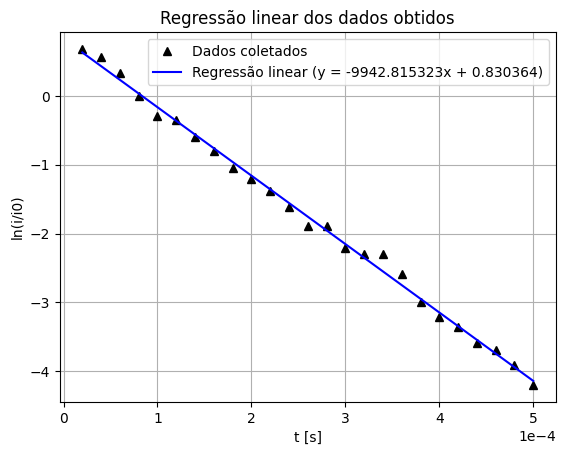

a = -9942.8153, b = 0.83, σa = 127.7787, σb = 0.04, σy = 0.1


In [7]:
ln_i = [
0.6830968447 ,0.5596157879 ,0.3364722366 ,0 ,-0.2876820725 ,-0.3566749439 ,-0.5978370008 ,-0.7985076962
,-1.049822124 ,-1.203972804 ,-1.386294361 ,-1.609437912 ,-1.897119985 ,-1.897119985 ,-2.207274913 ,-2.302585093 ,-2.302585093 ,-2.590267165
,-2.995732274 ,-3.218875825 ,-3.352407217 ,-3.593569274 ,-3.688879454 ,-3.912023005 ,-4.199705078]

t = [
0.2 ,0.4 ,0.6 ,0.8 ,1 ,1.2 ,1.4 ,1.6 ,1.8 ,2 ,2.2 ,2.4 ,2.6 ,2.8 ,3 ,3.2 ,3.4 ,3.6 ,3.8 ,4 ,4.2 ,4.4 ,4.6 ,4.8 ,5
]

for i in range(len(t)):
    t[i]*=pow(10, -4)


regressao = LRegression(t, ln_i, 'b-', 'Regressão linear dos dados obtidos', 'exp1-graph1.jpg', "t [s]", "ln(i/i0)")
a, b, incA, incB, incY = regressao.get()
print(f'a = {a :.4f}, b = {b :.2f}, σa = {incA :.4f}, σb = {incB :.2f}, σy = {incY :.1f}')
